# Matrix norms

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Here's a matrix of which we're trying to compute the norm:

In [14]:
n = 2
A = np.random.randn(n, n)
A

array([[-0.12603194,  0.74240991],
       [ 0.07209953, -0.91593647]])

Recall:

$$||A||=\max_{\|x\|=1} \|Ax\|,$$

where the vector norm must be specified, and the value of the matrix norm $\|A\|$ depends on the choice of vector norm.

For instance, for the $p$-norms, we often write:

$$||A||_2=\max_{\|x\|=1} \|Ax\|_2,$$

and similarly for different values of $p$.

--------------------
We can approximate this by just producing very many random vectors and evaluating the formula:

In [3]:
xs = np.random.randn(n, 1000)

First, we need to bring all those vectors to have norm 1. First, compute the norms:

In [4]:
p = 2
norm_xs = np.sum(np.abs(xs)**p, axis=0)**(1/p)
norm_xs.shape

(1000,)

Then, divide by the norms and assign to `normalized_xs`:

Then check the norm of a randomly chosen vector.

In [16]:
normalized_xs = xs/norm_xs
la.norm(normalized_xs[:, 316], p)

1.0

Let's take a look:

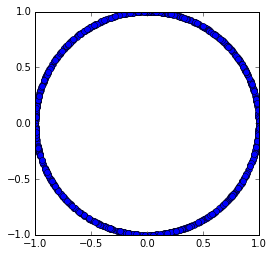

In [17]:
pt.plot(normalized_xs[0], normalized_xs[1], "o")
pt.gca().set_aspect("equal")

Now apply $A$ to these normalized vectors:

In [7]:
A_nxs = A.dot(normalized_xs)

--------------
Let's take a look again:

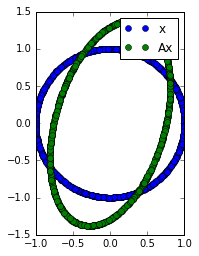

In [8]:
pt.plot(normalized_xs[0], normalized_xs[1], "o", label="x")
pt.plot(A_nxs[0], A_nxs[1], "o", label="Ax")
pt.legend()
pt.gca().set_aspect("equal")

Next, compute norms of the $Ax$ vectors:

In [9]:
norm_Axs = np.sum(np.abs(A_nxs)**p, axis=0)**(1/p)
norm_Axs.shape

(1000,)

What's the biggest one?

In [10]:
np.max(norm_Axs)

1.4175372998707851

Compare that with what `numpy` thinks the matrix norm is:

In [11]:
la.norm(A, p)

1.4175373681672399